In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [5]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
# Question 1: Extract Tesla stock data using yfinance
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Create ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Extract stock history with max period
tesla_data = tesla.history(period="max")

# Reset index
tesla_data.reset_index(inplace=True)

# Display first 5 rows
print("Tesla Stock Data (first 5 rows):")
print(tesla_data.head())

Tesla Stock Data (first 5 rows):
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [7]:
# Question 2: Extract Tesla revenue data using web scraping
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

# Parse HTML
soup = BeautifulSoup(html_data, 'html.parser')

# Create empty dataframe
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find the table (index 1 for quarterly data)
for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    if len(col) >= 2:
        date = col[0].text
        revenue = col[1].text
        # Add to dataframe
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({
            "Date": [date],
            "Revenue": [revenue]
        })], ignore_index=True)

# Clean revenue column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display last 5 rows
print("\nTesla Revenue Data (last 5 rows):")
print(tesla_revenue.tail())


Tesla Revenue Data (last 5 rows):
          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [9]:
# Question 3: Extract GameStop stock data using yfinance
gme = yf.Ticker("GME")

# Extract stock history with max period
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Display first 5 rows
print("GameStop Stock Data (first 5 rows):")
print(gme_data.head())

GameStop Stock Data (first 5 rows):
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [10]:
# Question 4: Extract GameStop revenue data using web scraping
url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url_2).text

# Parse HTML
soup_2 = BeautifulSoup(html_data_2, 'html.parser')

# Create empty dataframe
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find the table (index 1 for quarterly data)
for row in soup_2.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    if len(col) >= 2:
        date = col[0].text
        revenue = col[1].text
        # Add to dataframe
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({
            "Date": [date],
            "Revenue": [revenue]
        })], ignore_index=True)

# Clean revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Display last 5 rows
print("\nGameStop Revenue Data (last 5 rows):")
print(gme_revenue.tail())


GameStop Revenue Data (last 5 rows):
          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709



Tesla Graph:


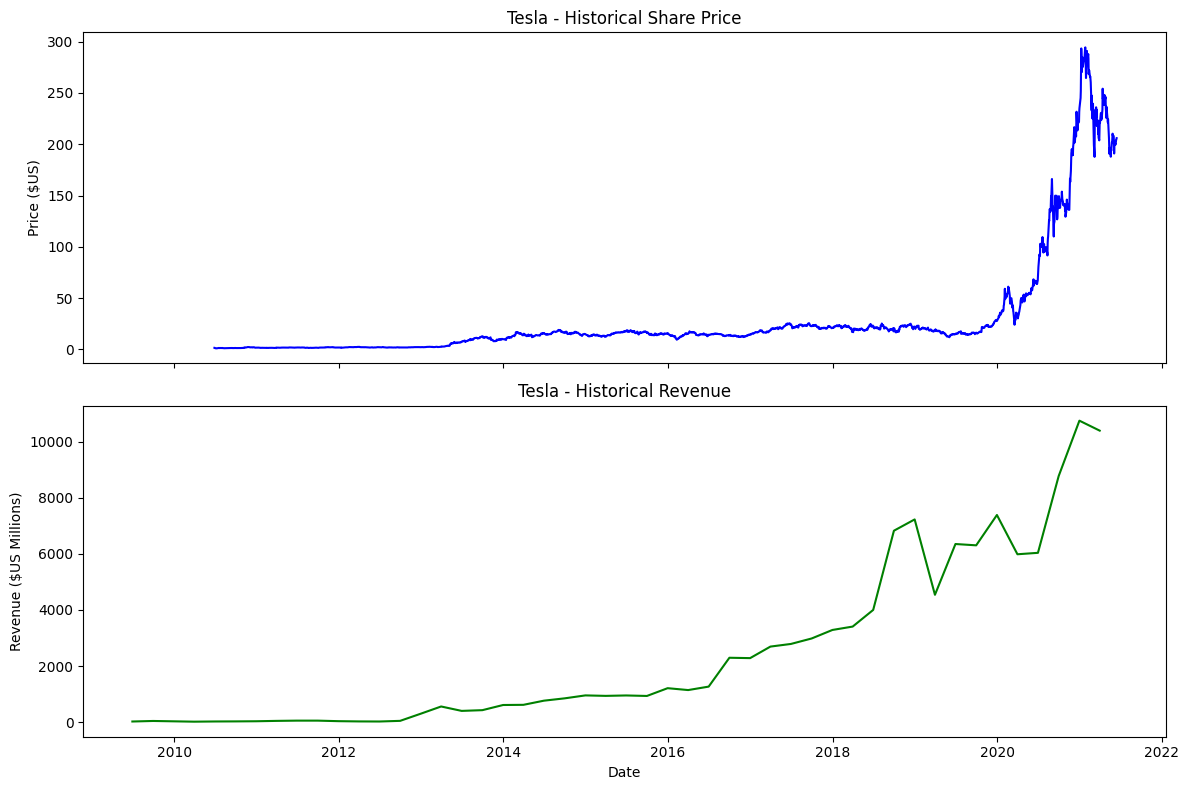

In [11]:
# Question 5: Plot Tesla stock graph
# First, make sure make_graph function is defined (it should be in your notebook)

import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")
    
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")
    
    plt.tight_layout()
    plt.show()

# Create Tesla graph
print("\nTesla Graph:")
make_graph(tesla_data, tesla_revenue, 'Tesla')


GameStop Graph:


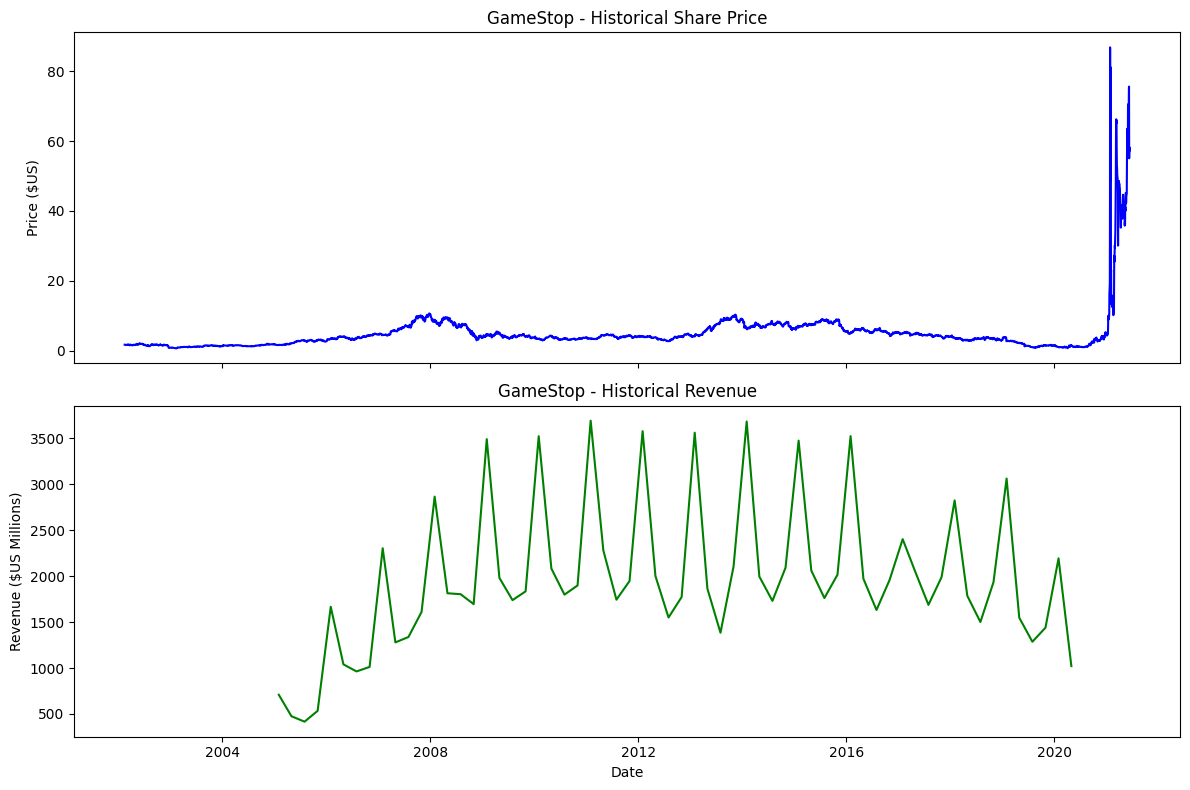

In [12]:
# Question 6: Plot GameStop stock graph
print("\nGameStop Graph:")
make_graph(gme_data, gme_revenue, 'GameStop')

In [13]:
## Bonus Chart, I'm just curious to compare them

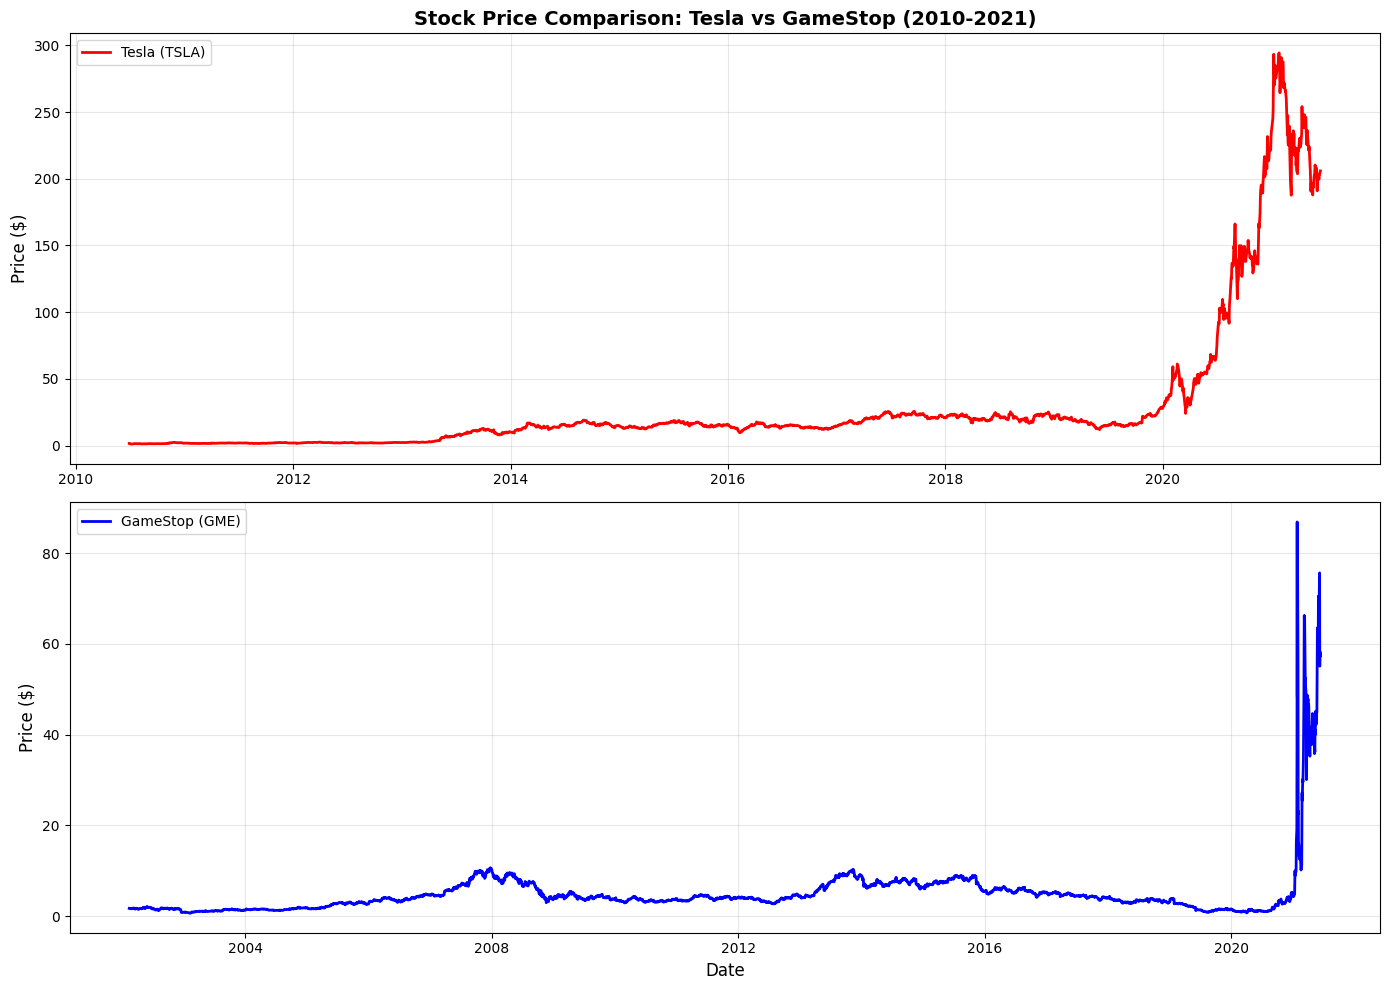

In [15]:
# Comparative Graph 1: Stock Price Comparison (Tesla vs GameStop)
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Filter data up to June 2021
tesla_filtered = tesla_data[tesla_data['Date'] <= '2021-06-14']
gme_filtered = gme_data[gme_data['Date'] <= '2021-06-14']

# Plot Tesla stock price
ax1.plot(tesla_filtered['Date'], tesla_filtered['Close'], 
         label='Tesla (TSLA)', color='red', linewidth=2)
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.set_title('Stock Price Comparison: Tesla vs GameStop (2010-2021)', 
              fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot GameStop stock price
ax2.plot(gme_filtered['Date'], gme_filtered['Close'], 
         label='GameStop (GME)', color='blue', linewidth=2)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Price ($)', fontsize=12)
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()